In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

'''
To classify images using a recurrent neural network, we consider every image
row as a sequence of pixels. Because MNIST image shape is 28*28px, we will then
handle 28 sequences of 28 steps for every sample.
'''
# Training Parameters
learning_rate = 0.001
epochs = 1
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, timesteps, 1)
    
    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
    
    
    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

In [3]:
save_file = './saved_models2/cnn_model_0.ckpt' 

saver = tf.train.Saver()

In [4]:
# #with tf.variable_scope(tf.get_variable_scope(), reuse=True):
#         test_lstm_model = LSTM_Model(embedding_size, rnn_size, batch_size, learning_rate,
#                                   training_seq_len, vocab_size, infer_sample=True)

#logits = RNN(X, weights, biases,reuse = True)
logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# We're using Stochastic batch gradient with mini batches.

In [5]:
# Start training

# Run the initializer
train_loss = []
train_acc = []
writer = tf.summary.FileWriter('/home/user/Downloads/saved_models2',tf.get_default_graph()) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs): # if we train with more epochs than we can attain more accuracy
        for step in range(1, training_steps+1):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Reshape data to get 28 seq of 28 elements
            batch_x = batch_x.reshape((batch_size, timesteps, num_input))
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            
            if step % display_step == 0 or step == 1:
                # Calculate batch loss and accuracy
                loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,Y: batch_y})
                print("epoch " + str(epoch) + ",Step " + str(step) + ", Minibatch Loss= " + \
                      "{:.4f}".format(loss) + ", Training Accuracy= " + \
                      "{:.3f}".format(acc))
            train_loss.append(loss)
            train_acc.append(acc)
    print("Optimization Finished!")
    
    saver.save(sess, save_file)
    print("Model saved as {}".format(save_file))
writer.close()   

epoch 0,Step 1, Minibatch Loss= 3.1250, Training Accuracy= 0.109
epoch 0,Step 200, Minibatch Loss= 2.1893, Training Accuracy= 0.227
epoch 0,Step 400, Minibatch Loss= 1.9535, Training Accuracy= 0.352
epoch 0,Step 600, Minibatch Loss= 1.7971, Training Accuracy= 0.414
epoch 0,Step 800, Minibatch Loss= 1.8570, Training Accuracy= 0.461
epoch 0,Step 1000, Minibatch Loss= 1.6602, Training Accuracy= 0.453
epoch 0,Step 1200, Minibatch Loss= 1.4860, Training Accuracy= 0.508
epoch 0,Step 1400, Minibatch Loss= 1.5762, Training Accuracy= 0.477
epoch 0,Step 1600, Minibatch Loss= 1.3838, Training Accuracy= 0.516
epoch 0,Step 1800, Minibatch Loss= 1.3894, Training Accuracy= 0.516
epoch 0,Step 2000, Minibatch Loss= 1.3719, Training Accuracy= 0.555
epoch 0,Step 2200, Minibatch Loss= 1.2051, Training Accuracy= 0.586
epoch 0,Step 2400, Minibatch Loss= 1.3407, Training Accuracy= 0.547
epoch 0,Step 2600, Minibatch Loss= 1.2452, Training Accuracy= 0.625
epoch 0,Step 2800, Minibatch Loss= 1.1651, Training Acc

In [6]:
best_trained_model_path = './saved_models2/cnn_model_0.ckpt' 

# Uncomment this to use your own trained model instead
save_file = best_trained_model_path
test_len = 128
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, save_file)
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

INFO:tensorflow:Restoring parameters from ./saved_models2/cnn_model_0.ckpt
Testing Accuracy: 0.0703125


ValueError: x and y must have same first dimension, but have shapes (1,) and (10000,)

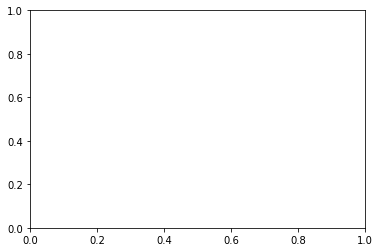

In [7]:
epoch_seq = np.arange(1, epoch+2)
plt.plot(epoch_seq, train_loss, 'k--', label='Train Set')
#plt.plot(epoch_seq, test_loss, 'r-', label='Test Set')
plt.title('Softmax Loss')
plt.xlabel('Epochs')
plt.ylabel('Softmax Loss')
plt.legend(loc='upper left')
plt.show()
# Plot accuracy over time
plt.plot(epoch_seq, train_acc, 'k--', label='Train Set')
#plt.plot(epoch_seq, test_accuracy, 'r-', label='Test Set')
plt.title('val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Calculate accuracy for 128 mnist test images
with tf.Session() as sess: 
    sess.run(init)
  